In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing

In [2]:
train=pd.read_csv("../input/my-dataset/credit_train.csv")
test=pd.read_csv("../input/my-dataset/credit_test.csv")
train=train.drop(train[train["Customer ID"].isnull()==True].index)
train.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [3]:
train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [4]:
train[train['Credit Score']>800].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.0,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,NaN,4.0,0.0,132468.0,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.0,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,48.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,NaN,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,NaN,5.0,0.0,474658.0,742720.0,0.0,0.0


In [5]:
train['Credit Score'] = train['Credit Score'].apply(lambda val: (val /10) if val>850 else val)
train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,716.293447,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,28.297164,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,703.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,722.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,738.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [6]:
train.dropna(subset=['Loan Status'], inplace = True)
le=preprocessing.LabelEncoder()
train['Loan Status'] = le.fit_transform(train['Loan Status'])
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


<AxesSubplot:title={'center':'Status of the Loan'}>

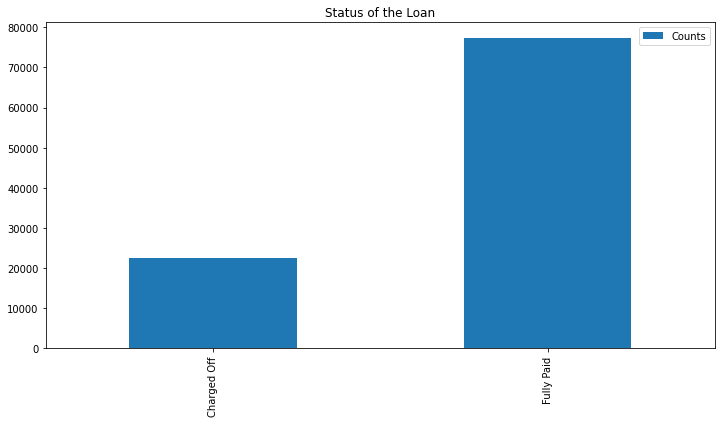

In [7]:
coffvalue = train[train['Loan Status'] == 0]['Loan Status'].count()
fpaidvalue = train[train['Loan Status'] == 1]['Loan Status'].count()
data = {"Counts":[coffvalue, fpaidvalue] }
statusDF = pd.DataFrame(data, index=["Charged Off", "Fully Paid"])
plt.rcParams["figure.figsize"] = (12, 6)
statusDF.plot(kind='bar', title="Status of the Loan")

In [8]:
print("Value counts for each term:\n",train['Term'].value_counts())
print("Missing data in loan term:",train['Term'].isna().sum())

Value counts for each term:
 Short Term    72208
Long Term     27792
Name: Term, dtype: int64
Missing data in loan term: 0


In [9]:
train['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [10]:
scount = train[train['Term'] == 0]['Term'].count()
lcount = train[train['Term'] ==1]['Term'].count()

data = {"Counts":[scount, lcount]}
termDF = pd.DataFrame(data, index=["Short Term", "Long Term"])
termDF.head()

,Counts
Short Term,72208
Long Term,27792


<AxesSubplot:title={'center':'Term of Loans'}>

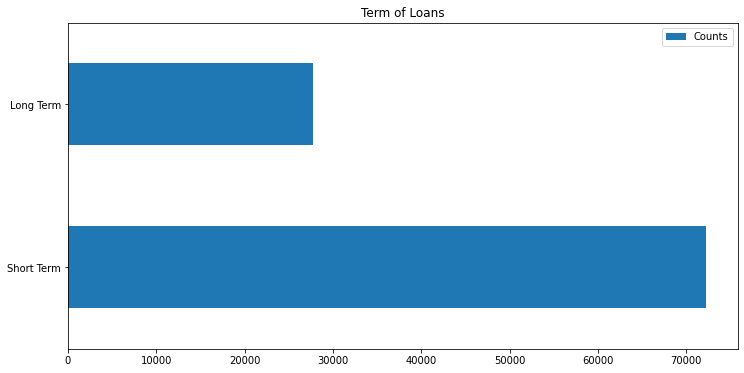

In [11]:
termDF.plot(kind="barh", title="Term of Loans")

In [12]:
print("There are ", train['Credit Score'].isnull().sum(), "null values for Credit score.")

There are  19154 null values for Credit score.


In [13]:
cscoredf = train[train['Term']==0]
stermAVG = cscoredf['Credit Score'].mean()
print(stermAVG)

724.6209386906824


In [14]:
lscoredf = train[train['Term']==1]
ltermAVG = lscoredf['Credit Score'].mean()
print(ltermAVG)

695.483727170432


In [15]:
train.loc[(train.Term ==0) & (train['Credit Score'].isnull()),'Credit Score'] = stermAVG
train.loc[(train.Term ==1) & (train['Credit Score'].isnull()),'Credit Score'] = ltermAVG

In [16]:
train['Credit Score'] = train['Credit Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
train['Credit Score'] = train['Credit Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
train['Credit Score'] = train['Credit Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
train['Credit Score'] = train['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
train['Credit Score'] = train['Credit Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)

<AxesSubplot:title={'center':'Number of loans in terms of Credit Score category'}>

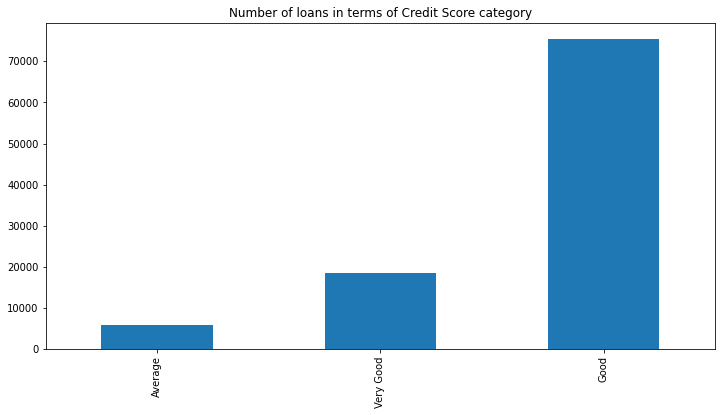

In [17]:
train['Credit Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of loans in terms of Credit Score category')

**Next up we look at our annual income column and fill up the missing values with the average of the column.**

In [18]:
print("There are",train['Annual Income'].isna().sum(), "Missing Annual Income Values.")

There are 19154 Missing Annual Income Values.


In [19]:
train['Annual Income'].fillna(train['Annual Income'].mean(), inplace=True)
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,Good,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,Good,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,Very Good,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,Good,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,Good,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


**Following up on our step with Credit Score, we now try to change it to a discrete value, but since it has multiple class, we use one hot encoding to make sure we dont increase the dimension of our data. We also look out for potential multi-colinearity as we drop one variable of the encoding, which is easily calculated given the other four variables. This is consistent through out the notebook, with the use of one hot encoding.**

In [20]:
train = train.join(pd.get_dummies(train['Credit Score'], drop_first = True))
#Since our values were only adjectives, we give it new names to make it more clear.
train.rename(index = str, columns={'Good':'Credit Good', 'Very Good':'Credit Very Good'})

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Good,Credit Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,Good,1.167493e+06,8 years,Home Mortgage,Home Improvements,...,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,Good,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,...,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,Very Good,2.231892e+06,8 years,Own Home,Debt Consolidation,...,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,Good,8.069490e+05,3 years,Own Home,Debt Consolidation,...,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,Good,1.378277e+06,5 years,Rent,Debt Consolidation,...,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,1,147070.0,0,Good,4.754370e+05,7 years,Own Home,other,...,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0,1,0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,1,99999999.0,0,Good,1.289416e+06,1 year,Rent,Debt Consolidation,...,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0,1,0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,1,103136.0,0,Very Good,1.150545e+06,6 years,Rent,Debt Consolidation,...,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0,0,1
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,1,530332.0,0,Very Good,1.717524e+06,9 years,Rent,Debt Consolidation,...,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0,0,1


<AxesSubplot:title={'center':'Purpose for Loans'}>

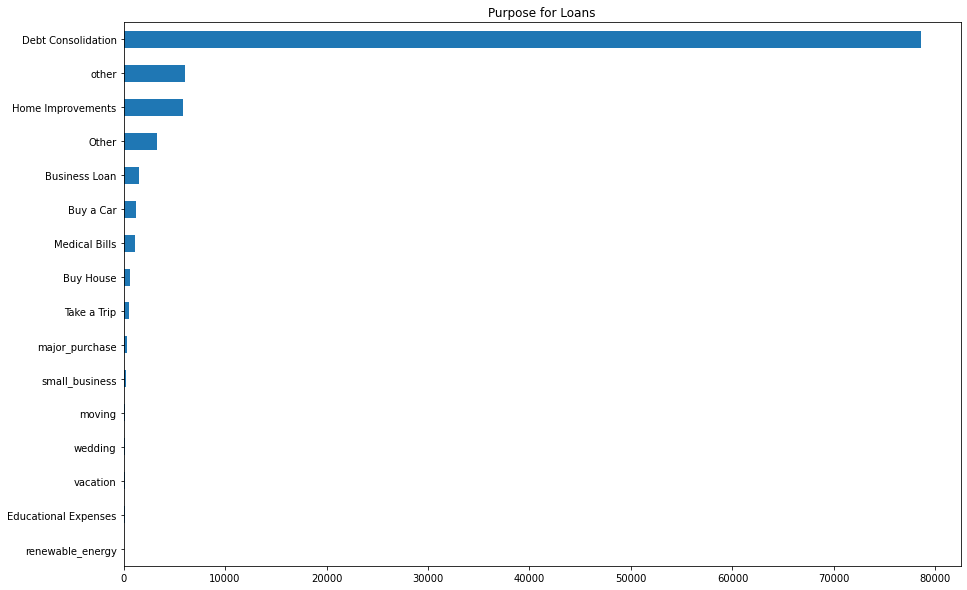

In [21]:
train = train.drop(['Credit Score'], axis=1)
train['Purpose'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Purpose for Loans", figsize=(15,10))

In [22]:
purposeloanstatus = train[['Purpose','Loan Status']]
purposeloanstatus.head()

,Purpose,Loan Status
0,Home Improvements,1
1,Debt Consolidation,1
2,Debt Consolidation,1
3,Debt Consolidation,1
4,Debt Consolidation,1


<AxesSubplot:title={'center':'Purpose of Loan Vs Loan Payment Status'}, xlabel='Purpose'>

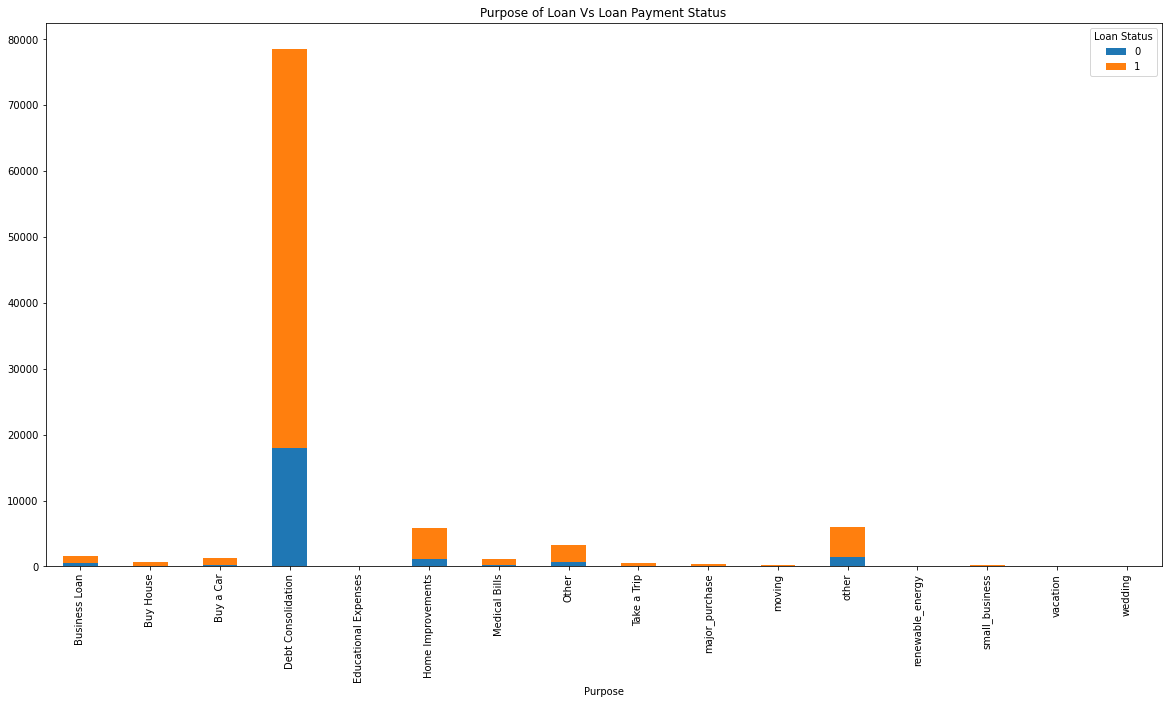

In [23]:
pd.crosstab(purposeloanstatus['Purpose'], purposeloanstatus['Loan Status']).plot(kind='bar', stacked=True, figsize=(20,10), title="Purpose of Loan Vs Loan Payment Status", )

**Next up, we take a look at the Home ownership status of the people who have taken loan and try to visualize it.**

<AxesSubplot:title={'center':'Number of Loan based on Home ownership'}>

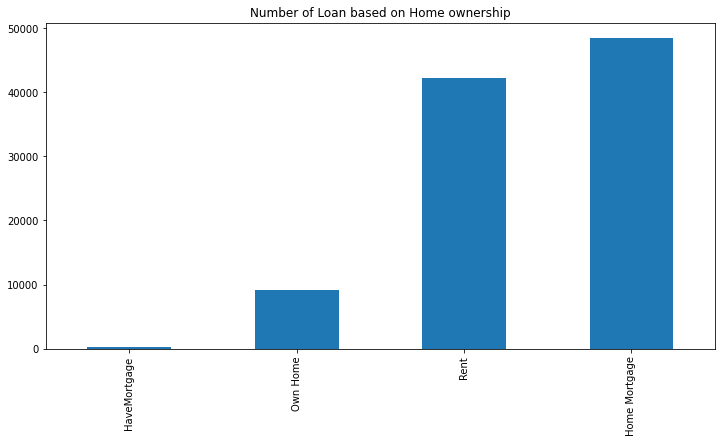

In [24]:
train['Home Ownership'].value_counts().sort_values(ascending = True).plot(kind='bar', title="Number of Loan based on Home ownership")

As we can see most of the loans have been either by the people have mortgage on their home or by people who are in rent.

In [25]:
train = train.join(pd.get_dummies(train['Home Ownership'],drop_first = True))
train = train.drop(['Home Ownership'], axis=1)


Moving forward, age of employment is one of the major factor in deciding the person's financial stability and secure income sources. Here our data was a String with non uniform spread. first we need to extract the given numbers from our data and then give it a unform range to convert it into a categorical variable

In [26]:
train['Years in current job']=train['Years in current job'].str.extract(r"(\d+)")
train['Years in current job'] = train['Years in current job'].astype(float)
expmean = train['Years in current job'].mean()
train['Years in current job'].fillna(expmean, inplace=True)

Now That we have a numerical value for our Employment Age, we use a uniform range to convert it into categories.

In [27]:
train['Employment History'] = train['Years in current job'].apply(lambda x: "Emp Level Jr." if x<4 else ("Emp Level Mid" if x>4 and x<8 else "Emp Senior"))

In [28]:
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Purpose,Monthly Debt,Years of Credit History,...,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Employment History
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,1.167493e+06,8.0,Home Improvements,5214.74,17.2,...,228190.0,416746.0,1.0,0.0,1,0,1,0,0,Emp Senior
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,1.378277e+06,10.0,Debt Consolidation,33295.98,21.1,...,229976.0,850784.0,0.0,0.0,1,0,1,0,0,Emp Senior
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,2.231892e+06,8.0,Debt Consolidation,29200.53,14.9,...,297996.0,750090.0,0.0,0.0,0,1,0,1,0,Emp Senior
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,8.069490e+05,3.0,Debt Consolidation,8741.90,12.0,...,256329.0,386958.0,0.0,0.0,1,0,0,1,0,Emp Level Jr.
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,1.378277e+06,5.0,Debt Consolidation,20639.70,6.1,...,253460.0,427174.0,0.0,0.0,1,0,0,0,1,Emp Level Mid


In [29]:
train = train.drop(['Years in current job'], axis=1)

Now that we have the categories for our employment history, we use one hot encoding on the column.

In [30]:
train = train.join(pd.get_dummies(train['Employment History'],drop_first = True))

we then drop the Employment History column.

In [31]:
train = train.drop(['Employment History'], axis=1)

If we take a look at our data, there are columns like Loan ID, Customer ID which isn't important for our analysis. While we can argue in some cases purpose of loan could be one deciding factor but here we consider it to be unimportant and drop that as well.

In [32]:
train = train.drop(['Loan ID','Customer ID','Purpose'], axis=1)
train.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior
0,1,445412.0,0,1.167493e+06,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0,1,0,0,0,1
1,1,262328.0,0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0,1,0,0,0,1
2,1,99999999.0,0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,1,0,0,1
3,1,347666.0,1,8.069490e+05,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,1,0,0,0
4,1,176220.0,0,1.378277e+06,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0,0,0,1,1,0


Next up is number of credit problems reported for each individual loanee. We split that into three categories with 0 being None, 1-5 as Some and more than 5 to be major credit problems.

In [33]:
train['Credit Problems'] = train['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 else ("Some Credit promblem" if x>0 and x<5 else "Major Credit Problems"))

In [34]:
train['Credit Problems'].value_counts()

No Credit Problem        86035
Some Credit promblem     13879
Major Credit Problems       86
Name: Credit Problems, dtype: int64

<AxesSubplot:title={'center':'Loans vs Credit problems of Loanee'}>

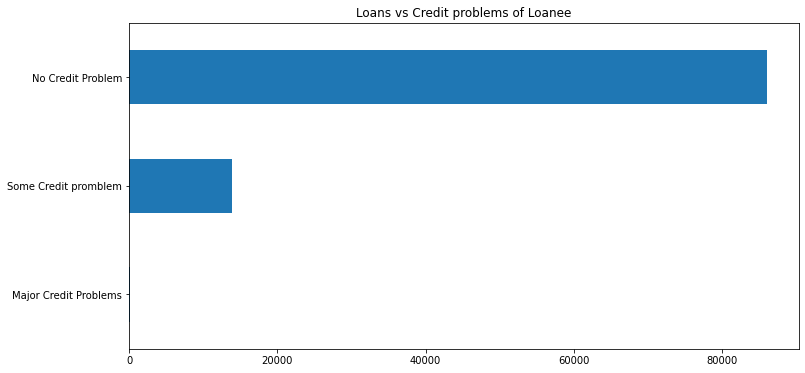

In [35]:
train['Credit Problems'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Loans vs Credit problems of Loanee")

Looking at the graph above, we establish a common asumption that loans are generally not given to people having credit problems. Next up, we convert Credit Problems into discrete variables.

In [36]:
train = train.join(pd.get_dummies(train['Credit Problems'],drop_first = True))
train = train.drop(['Credit Problems','Number of Credit Problems'], axis=1)
train.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,...,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem
0,1,445412.0,0,1.167493e+06,5214.74,17.2,NaN,6.0,228190.0,416746.0,...,0.0,1,0,1,0,0,0,1,0,1
1,1,262328.0,0,1.378277e+06,33295.98,21.1,8.0,35.0,229976.0,850784.0,...,0.0,1,0,1,0,0,0,1,1,0
2,1,99999999.0,0,2.231892e+06,29200.53,14.9,29.0,18.0,297996.0,750090.0,...,0.0,0,1,0,1,0,0,1,0,1
3,1,347666.0,1,8.069490e+05,8741.90,12.0,NaN,9.0,256329.0,386958.0,...,0.0,1,0,0,1,0,0,0,1,0
4,1,176220.0,0,1.378277e+06,20639.70,6.1,NaN,15.0,253460.0,427174.0,...,0.0,1,0,0,0,1,1,0,1,0


Another important feature for financial stability identification is the years of credit history. We look at the given credit age of individuals and categorize them using one hot encoding.

In [37]:
train['Credit Age'] = train['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))
train = train.join(pd.get_dummies(train['Credit Age'],drop_first = True))
train = train.drop(['Credit Age','Years of Credit History'], axis =1)
train.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age
0,1,445412.0,0,1.167493e+06,5214.74,NaN,6.0,228190.0,416746.0,1.0,...,0,1,0,0,0,1,0,1,0,0
1,1,262328.0,0,1.378277e+06,33295.98,8.0,35.0,229976.0,850784.0,0.0,...,0,1,0,0,0,1,1,0,0,0
2,1,99999999.0,0,2.231892e+06,29200.53,29.0,18.0,297996.0,750090.0,0.0,...,1,0,1,0,0,1,0,1,1,0
3,1,347666.0,1,8.069490e+05,8741.90,NaN,9.0,256329.0,386958.0,0.0,...,0,0,1,0,0,0,1,0,1,0
4,1,176220.0,0,1.378277e+06,20639.70,NaN,15.0,253460.0,427174.0,0.0,...,0,0,0,1,1,0,1,0,1,0


We move forward with the asumption that some of the columns are correlated with the others and hence we try to reduce the number of features. For example, we have credit score and credit problems which can is calculated using features like maximum open credit, current credit balance etc. So we drop some of the columns that we asume are already covered by features we have on our dataframe.

In [38]:
train =train.drop(['Months since last delinquent','Number of Open Accounts','Maximum Open Credit','Current Credit Balance','Monthly Debt'],axis=1)
train.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age
0,1,445412.0,0,1.167493e+06,1.0,0.0,1,0,1,0,0,0,1,0,1,0,0
1,1,262328.0,0,1.378277e+06,0.0,0.0,1,0,1,0,0,0,1,1,0,0,0
2,1,99999999.0,0,2.231892e+06,0.0,0.0,0,1,0,1,0,0,1,0,1,1,0
3,1,347666.0,1,8.069490e+05,0.0,0.0,1,0,0,1,0,0,0,1,0,1,0
4,1,176220.0,0,1.378277e+06,0.0,0.0,1,0,0,0,1,1,0,1,0,1,0


Further exploring the financial stability of each loanee, we take the look at number of liens on their property by court which would give us information about their previous commitments.

In [39]:
train['Tax Liens'] = train['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))
train = train.join(pd.get_dummies(train['Tax Liens'],drop_first = True))
train = train.drop(['Tax Liens'],axis=1)
train.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Bankruptcies,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens
0,1,445412.0,0,1.167493e+06,1.0,1,0,1,0,0,0,1,0,1,0,0,1,0
1,1,262328.0,0,1.378277e+06,0.0,1,0,1,0,0,0,1,1,0,0,0,1,0
2,1,99999999.0,0,2.231892e+06,0.0,0,1,0,1,0,0,1,0,1,1,0,1,0
3,1,347666.0,1,8.069490e+05,0.0,1,0,0,1,0,0,0,1,0,1,0,1,0
4,1,176220.0,0,1.378277e+06,0.0,1,0,0,0,1,1,0,1,0,1,0,1,0


Furthermore, we take a look at nuber of bankruptcies filed by people and categorize them.

In [40]:
train['Bankruptcies'] = train['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))
train = train.join(pd.get_dummies(train['Bankruptcies'],drop_first = True))
train = train.drop(['Bankruptcies'],axis=1)
train.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,1,445412.0,0,1.167493e+06,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,1,262328.0,0,1.378277e+06,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0
2,1,99999999.0,0,2.231892e+06,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
3,1,347666.0,1,8.069490e+05,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0
4,1,176220.0,0,1.378277e+06,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0


In [41]:
train.describe()

,Loan Status,Current Loan Amount,Term,Annual Income,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
count,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,0.773610,1.176045e+07,0.277920,1.378277e+06,0.755060,0.184790,0.48410,0.091820,0.421940,0.222720,0.458010,0.860350,0.138790,0.49848,0.001940,0.980620,0.017170,0.887740,0.10892
std,0.418496,3.178394e+07,0.447976,9.722974e+05,0.430054,0.388129,0.49975,0.288773,0.493872,0.416074,0.498236,0.346625,0.345729,0.50000,0.044003,0.137857,0.129905,0.315688,0.31154
min,0.000000,1.080200e+04,0.000000,7.662700e+04,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,1.796520e+05,0.000000,9.311805e+05,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.00000
50%,1.000000,3.122460e+05,0.000000,1.369919e+06,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.00000
75%,1.000000,5.249420e+05,1.000000,1.512704e+06,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.00000
max,1.000000,1.000000e+08,1.000000,1.655574e+08,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000


We already know we're predicting categorical variables hence we have to convert our cateorical variables into discrete. Next up we try to convert annual income and total loan amount into discrete variables. There are some calculation we do before deciding a range from the categories. If we take a look, we have some data that are outliers and are way off the other loan amounts. so we try to calculate the average and standard deviation without the outlier. We asume : Mean - 1 standard deviation = low income line Mean + 1 standard deviation = high income line and similar for the loan amount as well.

In [42]:
meanxoutlier = train[train['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
stddevxoutlier = train[train['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier
train['Annual Income'] = train['Annual Income'].apply(lambda x: "Low Income" if x<=poorline else ("Average Income" if x>poorline and x<richline else "High Income"))
train = train.join(pd.get_dummies(train['Annual Income'],drop_first = True))
train = train.drop(['Annual Income'], axis=1)
train.head()

,Loan Status,Current Loan Amount,Term,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income
0,1,445412.0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,262328.0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0
2,1,99999999.0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,1,347666.0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0
4,1,176220.0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0


In [43]:
lmeanxoutlier = train[train['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstddevxoutlier = train[train['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)

126051.43019084871 498575.7655703696


In [44]:
train['Current Loan Amount'] = train['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=lowrange else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))
train = train.join(pd.get_dummies(train['Current Loan Amount'],drop_first = True))
train = train.drop(['Current Loan Amount'], axis=1)
train.head()

,Loan Status,Term,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,...,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income,Medium Loan,Small Loan
0,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0,1,0,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
2,1,0,0,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
3,1,1,1,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,1,0


Now we can see that we have all categorical values for our dataframe we can divide it into training and test set and plug into some classification algorithm.

In [45]:
y = train['Loan Status']
X = train.drop(['Loan Status'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
knnclassifier = KNeighborsClassifier(n_neighbors = int(X.shape[1]/2))
knnclassifier.fit(X_train, y_train)
prediction = knnclassifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, prediction))

Accuracy Score:  0.7507575757575757


In [46]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, prediction).ravel()
print(tneg,fpos,fneg,tpos)

670 6864 1361 24105


In [47]:
lregclassifier = LogisticRegression()
lregclassifier.fit(X_train,y_train)
lregprediction = lregclassifier.predict(X_test)
print("Score: ",lregclassifier.score(X_test, y_test))

Score:  0.7717272727272727


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [48]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, lregprediction).ravel()
print(tneg,fpos,fneg,tpos)

5 7529 4 25462


In [49]:
from sklearn.svm import SVC
clf = SVC(gamma='auto', kernel ='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))

Accuracy Score:  0.7716969696969697


In [50]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, pred).ravel()
print(tneg,fpos,fneg,tpos)

0 7534 0 25466


In [51]:
XGBclf = XGBClassifier()
XGBclf.fit(X_train,y_train)
XGBpred = XGBclf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, XGBpred))

Accuracy Score:  0.7701212121212121


In [52]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, XGBpred).ravel()
print(tneg,fpos,fneg,tpos)

81 7453 133 25333


In [53]:
SGDclf = SGDClassifier(loss='modified_huber',shuffle=True)
SGDclf.fit(X_train,y_train)
SGDpred = SGDclf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, SGDpred))

Accuracy Score:  0.7716666666666666


In [54]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, SGDpred).ravel()
print(tneg,fpos,fneg,tpos)

0 7534 1 25465
